In [1]:
%matplotlib inline

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from energy_markets import EnergyMarket
from energy_sectors import NonRenewableEnergySector, RenewableEnergySector


## Renewable energy sector

\begin{align}
    SAK^{\alpha} - RK \\
    SA\alpha K^{\alpha - 1} - R = 0  \\
    A\alpha K^{\alpha - 1} = \frac{R}{S} \\
    K^{\alpha - 1} = \frac{R}{S} \frac{1}{A\alpha} \\
    K = \bigg(\frac{R}{S} \frac{1}{A\alpha}\bigg)^{\alpha - 1} = \bigg(\frac{S}{R} A\alpha\bigg)^{1 - \alpha}
\end{align}

## Non-renewable energy sector

Objective of the non-renewable energy sector is to maximize lifetime profits...

$$ V^{NRE}_0 = \sum_{t=0}^{\infty} \frac{1}{R}\Pi^{NRE}_t $$

where rofits in period $t$...

$$ \Pi^{NRE}_t = P^{E}_tE^{NRE}_t - P^{F}_t F_t - I_t - \Phi\bigg(\frac{I_t}{K^{NRE}_t}\bigg)K^{NRE}_t $$

...where the stock of physical capital used by non-renewable energy sector evolves according to...

$$ K^{NRE}_{t+1} = I_t + (1 - \delta)K^{NRE}_t $$

...and the per-unit investment adjustment costs are captured by the function $\Phi$.  Assume that $\Phi' > 0$ and the $\Phi'' > 0$ (i.e., that $\Phi$ is a convex function).

### Solution
Forming the Lagrangian...

$$ \mathcal{L} \equiv \sum_{t=0}^{\infty} \frac{1}{R}\Pi^{NRE}_t + q_t\bigg[I_t + (1 - \delta)K^{NRE}_t - K^{NRE}_{t+1}\bigg] $$

...choice variables are $F_t$, $I_t$. First-order conditions are...

\begin{align}
   \frac{\partial \mathcal{L}}{\partial F_t} = 0 \equiv 0 =& \psi_t(1-\beta) K^{NRE\ \beta}_t F^{-\beta}_t - P^F_t \\
   \frac{\partial \mathcal{L}}{\partial I_t} = 0 \equiv 0 =& q_t - 1 - \Phi'\bigg(\frac{I_t}{K^{NRE}_t}\bigg) \\
\end{align}


\begin{align}
    P(1 - \beta)\psi K^{\beta}F^{-\beta} = P^F\\
    P(1 - \beta)\psi K^{\beta} = P^FF^{\beta}\\
\end{align}

## Market for energy

## Model parameters

In [3]:
consumer_params = {'energy_quantity': 100}
renewable_params = {'alpha': 0.3, 'tfp': 3.692, 'gross_interest_rate': 1.09}
non_renewable_params = {'beta': 0.67, 'tfp': 1, 'gross_interest_rate': 1.09, 'fossil_fuel_price': 1, 'phi': 0.2, 'eta': 0.9}

In [4]:
def non_renewable_capital_dynamics(capital, previous_capital, consumer_params, non_renewable_params, renewable_params):
    """Second order difference equation describes the dynamics of capital stock."""
    price = EnergyMarket.find_market_price(capital, consumer_params, non_renewable_params, renewable_params)
    fossil_fuel = NonRenewableEnergySector.fossil_fuel_demand(capital, price, non_renewable_params)
    future_capital = NonRenewableEnergySector.future_capital_demand(capital, previous_capital, fossil_fuel, price, non_renewable_params)
    return future_capital


def non_renewable_nvmp_capital(capital, previous_capital, consumer_params, non_renewable_params, renewable_params):
    """Second order difference equation describes the dynamics of capital stock."""
    price = EnergyMarket.find_market_price(capital, consumer_params, non_renewable_params, renewable_params)
    fossil_fuel = NonRenewableEnergySector.fossil_fuel_demand(capital, energy_price=price, **non_renewable_params)
    return NonRenewableEnergySector.net_value_marginal_product_capital(capital, previous_capital, fossil_fuel, energy_price=price, **non_renewable_params)


In [5]:
non_renewable_capital_dynamics(10.0, 5.0, consumer_params, non_renewable_params, renewable_params)

8257.537913124143

In [7]:
def simulate_non_renewable_capital_dynamics(initial_capital, T, consumer_params, non_renewable_params, renewable_params):
    capital = np.empty(T)
    capital[0:2] = initial_capital
    
    for t in range(2, T):
        capital[t] = non_renewable_capital_dynamics(capital[t-1], capital[t-2], consumer_params, non_renewable_params, renewable_params)
    
    return capital

In [8]:
out = simulate_non_renewable_capital_dynamics(np.array([1e3, 1e3,]), 50, consumer_params, non_renewable_params, renewable_params)

AssertionError: Non-renewable energy sector marginal cost of capital of -0.1191161607858795 is not positive!

In [339]:
out

array([ 1000.        ,  1000.        ,   994.87952842,   995.45967281,
         989.70452055])

In [9]:
def equilibrium_energy_price(beta, gross_interest_rate, fossil_fuel_price, tfp, **params):
    return (1 / tfp) * (gross_interest_rate**beta * fossil_fuel_price**(1 - beta)) / (beta**beta * (1 - beta)**(1 - beta))

In [10]:
equilibrium_energy_price(**non_renewable_params)

1.9975425342898483

In [404]:
obj = lambda capital: non_renewable_capital_dynamics(capital, capital, consumer_params, non_renewable_params, renewable_params) - capital

In [405]:
obj(1)

4629976.939372866

In [411]:
optimize.brentq(obj, 1, 1000)

117.52490249611112

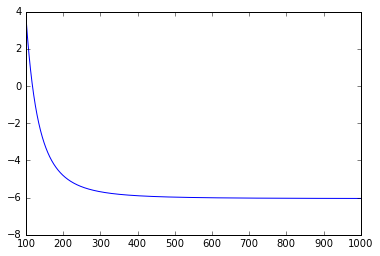

In [410]:
xs = np.logspace(2, 3, 1000)
plt.plot(xs, [obj(x) for x in xs])

In [395]:
nvpm_capital = lambda capital: non_renewable_nvmp_capital(capital, capital, consumer_params, non_renewable_params, renewable_params)

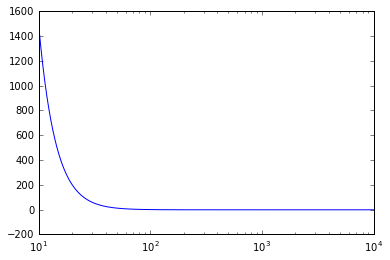

In [402]:
xs = np.logspace(1, 4, 1000)
plt.plot(xs, [nvpm_capital(x) for x in xs])
plt.xscale('log')

In [403]:
[nvpm_capital(x) for x in xs]

[1485.5568243623459,
 1456.3791041690185,
 1427.7692105070621,
 1399.7162028841888,
 1372.2093491084306,
 1345.2381213785698,
 1318.7921924466546,
 1292.8614318513314,
 1267.4359022207184,
 1242.5058556435356,
 1218.0617301073007,
 1194.0941460023284,
 1170.5939026903832,
 1147.5519751367947,
 1124.9595106048812,
 1102.8078254115785,
 1081.0884017431347,
 1059.7928845297949,
 1038.913078378409,
 1018.4409445618992,
 998.36859806457028,
 978.68830468223143,
 959.39247817614205,
 940.47367747980445,
 921.92460395762862,
 903.73809871454819,
 885.90713995563306,
 868.42484039480428,
 851.28444471175271,
 834.47932705617688,
 818.00298859848692,
 801.84905512611215,
 786.01127468459549,
 770.48351526263934,
 755.25976252031535,
 740.33411755963152,
 725.70079473670808,
 711.35411951476499,
 697.28852635720364,
 683.49855666003657,
 669.97885672293387,
 656.7241757582068,
 643.72936393699661,
 630.98937047201457,
 618.49924173614727,
 606.25411941626794,
 594.24923870162309,
 582.4799265061